######  The Situation

Hi, can you build a simple linear regression model with "price" as the target and the most correlated feature?
I had also like to see a few predictions of the common values of the feature selected.

######  Key Objectives
* Perform exploratory data analysis
* Build a simple linear regression with "price" as the target and the most correlated variable as the feature
* Interprete the model summary
* Visualize the model residuals
* Predict new price values with the model

###### Project Workflow
* Importation of packages
* Importation of dataset
* Data cleaning
* Descriptive analysis
* EDA
* Regression Analysis and Correlational analysis
* Machine Learning

* Importation of packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

* Importation of dataset

In [2]:
df = pd.read_csv(r'C:\Users\JAMES TECH\Downloads\Computers.csv')

In [3]:
df.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


* Data Cleaning

columns

In [4]:
df.columns

Index(['Unnamed: 0', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads', 'trend'],
      dtype='object')

data types

In [5]:
df.dtypes

Unnamed: 0     int64
price          int64
speed          int64
hd             int64
ram            int64
screen         int64
cd            object
multi         object
premium       object
ads            int64
trend          int64
dtype: object

shape

In [6]:
df.shape

(6259, 11)

missing values

In [7]:
df.isnull().sum()

Unnamed: 0    0
price         0
speed         0
hd            0
ram           0
screen        0
cd            0
multi         0
premium       0
ads           0
trend         0
dtype: int64

No missing values

dataset info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


* Descriptive Analysis

In [9]:
df.describe()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [10]:
df.describe(include = 'object')

,cd,multi,premium
count,6259,6259,6259
unique,2,2,2
top,no,no,yes
freq,3351,5386,5647


In [11]:
#drop the unnamed column as it will not be useful
df = df.drop(['Unnamed: 0'],axis = 1)

In [12]:
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


* Exploratory data analysis

cd

In [13]:
cd_counts = df['cd'].value_counts().to_frame()
cd_counts

,count
cd,
no,3351
yes,2908


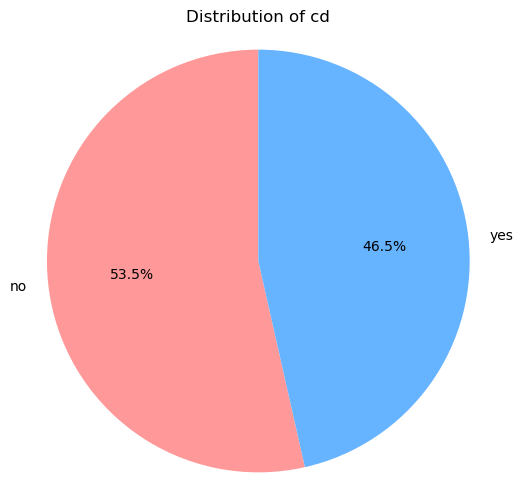

In [14]:
#plot
cd_counts = df['cd'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(cd_counts.values, labels=cd_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of cd')
plt.axis('equal')
plt.show()

They are less computers with cd than computers without cd

multi

In [15]:
multi_counts = df['multi'].value_counts().to_frame()
multi_counts

,count
multi,
no,5386
yes,873


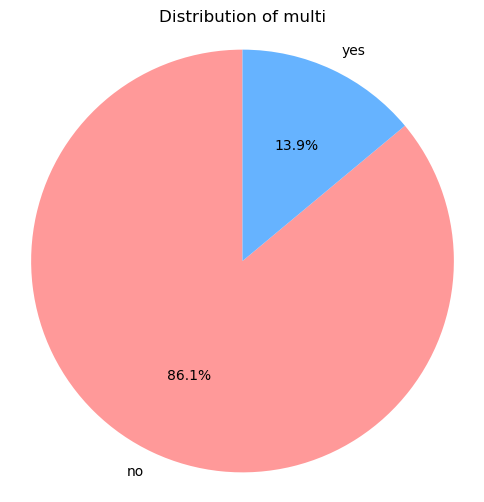

In [16]:
#plot
multi_counts = df['multi'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(multi_counts.values, labels=multi_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of multi')
plt.axis('equal')
plt.show()

There are more computers without multi than computers with multi

In [17]:
premium_counts = df['premium'].value_counts().to_frame()
premium_counts

,count
premium,
yes,5647
no,612


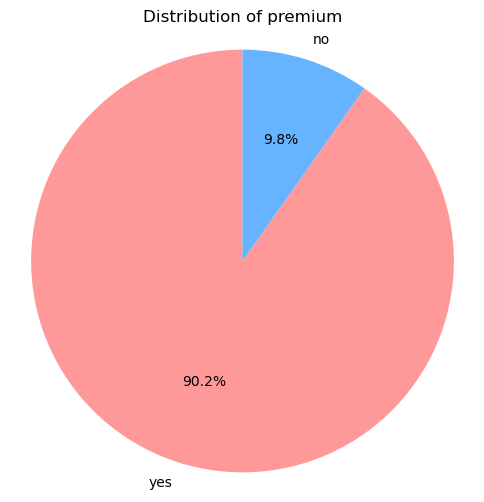

In [18]:
#plot
premium_counts = df['premium'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(premium_counts.values, labels=premium_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of premium')
plt.axis('equal')
plt.show()

There are more computers with premium than computers without premium

* Regression and correlational analysis

C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


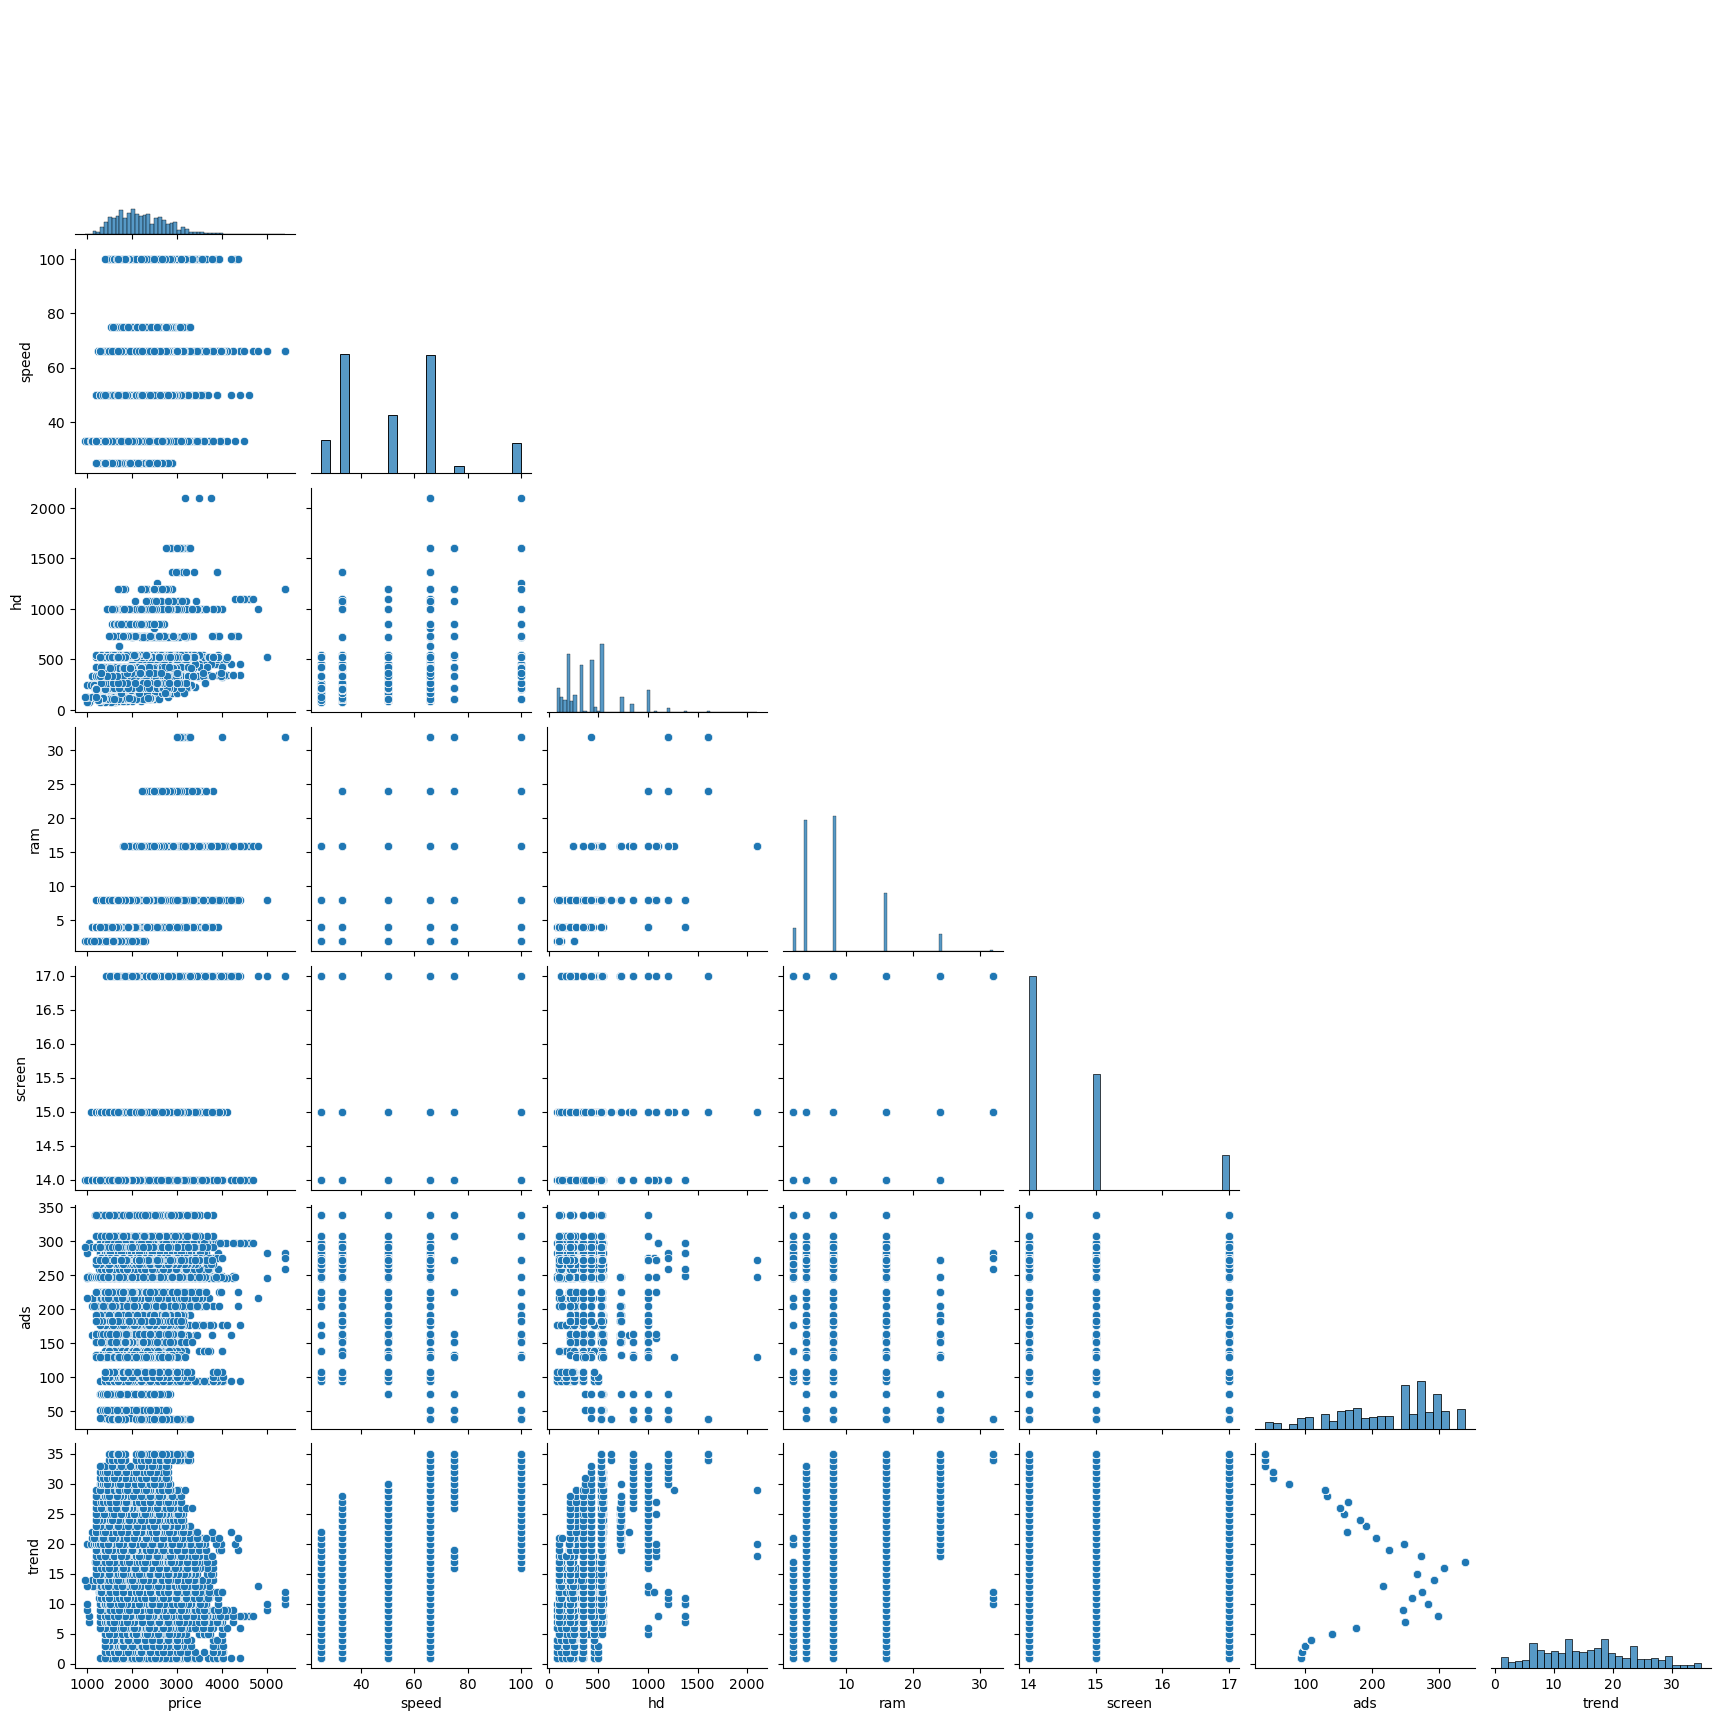

In [19]:
#pairplot
sns.pairplot(df,corner = True)

In [20]:
matrix_corr = df.corr(numeric_only = True)
matrix_corr

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


The variable

<Axes: >

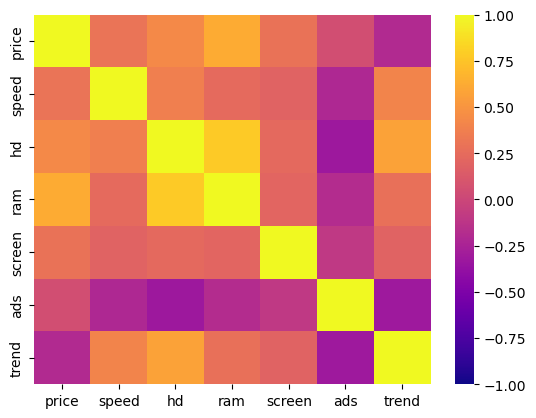

In [21]:
sns.heatmap(matrix_corr, vmin=-1, vmax=1,cmap='plasma')

* Note: The column ram is the most correlated amongs others

###### Regressional Analysis

(0.0, 5621.5)

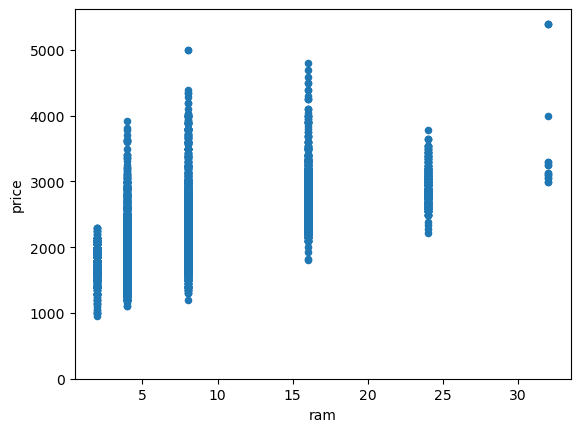

In [24]:
df.plot.scatter(x = 'ram',y = 'price').set_ylim(0)

* The higher the ram of the computer, the higher the price

Building the model

In [25]:
x = sm.add_constant(df['ram'])
y = df['price']
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     3964.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        08:04:44   Log-Likelihood:                -47180.
No. Observations:                6259   AIC:                         9.436e+04
Df Residuals:                    6257   BIC:                         9.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1687.2925     10.221    165.073      0.000    1667.255    1707.330
ram           64.2316      1.020     62.959      0.000      62.232      66.232
==============================================================================
Omnibus:                     1327.783   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3113.140
Skew:                           1.188   Prob(JB):                         0.00
Kurtosis:                       5.508   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Interpretation:
* The model withe the p_value of 0.000 is significant
* The model with the r2 of means that it is explaining 38% of our data which is not bad
* From the coef, it means that the ram of (64.2316) will cost ($1687.2925)

* Visualising the residual

<Axes: >

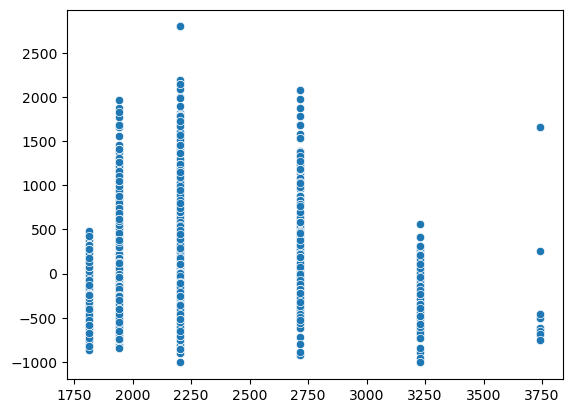

In [26]:
sns.scatterplot(x = model.predict(), y = model.resid)

* Making predictions

In [27]:
feature_values = [0,2,4,8,16,24,32,64,128,256]

x_predict = sm.add_constant(pd.DataFrame({'ram':feature_values}))

x_predict

,const,ram
0,1.0,0
1,1.0,2
2,1.0,4
3,1.0,8
4,1.0,16
5,1.0,24
6,1.0,32
7,1.0,64
8,1.0,128
9,1.0,256


In [28]:
predictions = model.predict(x_predict)
predictions.name ='predictions'
predictions

0     1687.292537
1     1815.755790
2     1944.219043
3     2201.145550
4     2714.998564
5     3228.851577
6     3742.704591
7     5798.116644
8     9908.940752
9    18130.588968
Name: predictions, dtype: float64

In [29]:
(df
 .query('ram in @feature_values')
 .groupby('ram')
 .agg({'price':'mean'})
 .reset_index()
 .merge(predictions,left_index = True, right_index = True)
 .assign(
        error = lambda x: x['predictions']-x['price'],
        pct_difference = lambda x:(x['error']/x['price'])*100
 )
)

,ram,price,predictions,error,pct_difference
0,2,1703.253807,1687.292537,-15.961270,-0.937105
1,4,1873.067084,1815.755790,-57.311294,-3.059757
2,8,2298.154741,1944.219043,-353.935698,-15.400865
3,16,2782.691767,2201.145550,-581.546217,-20.898693
4,24,2936.016835,2714.998564,-221.018271,-7.527827
5,32,3612.062500,3228.851577,-383.210923,-10.609200
